# Finding the Best Markets to Advertise In

We work for an e-learning company that offers courses on programming. We want to determine what the best markets are for us to advertise in.

To get more information about this, we will use Free Code Camp's New Coder Survey - here is a [link to the dataset](https://github.com/freeCodeCamp/2017-new-coder-survey). The survey has been taken by a wide range of novice coders, who would potentially represent the market we're interested in advertising to.

We'll first read in the data and examine its structure.

In [1]:
import pandas as pd

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', 
                     dtype = {'CodeEventOther': object, 'JobInterestOther':object})

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_seq_items', 150)

print(survey.shape)

survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
for c in survey.columns:
    print(c, ':', survey[c].notnull().sum())

Age : 15367
AttendedBootcamp : 17709
BootcampFinish : 1069
BootcampLoanYesNo : 1079
BootcampName : 949
BootcampRecommend : 1073
ChildrenNumber : 2314
CityPopulation : 15354
CodeEventConferences : 1609
CodeEventDjangoGirls : 165
CodeEventFCC : 1708
CodeEventGameJam : 290
CodeEventGirlDev : 297
CodeEventHackathons : 1977
CodeEventMeetup : 2472
CodeEventNodeSchool : 446
CodeEventNone : 1076
CodeEventOther : 570
CodeEventRailsBridge : 133
CodeEventRailsGirls : 132
CodeEventStartUpWknd : 544
CodeEventWkdBootcamps : 547
CodeEventWomenCode : 481
CodeEventWorkshops : 1753
CommuteTime : 9246
CountryCitizen : 15382
CountryLive : 15336
EmploymentField : 8116
EmploymentFieldOther : 1078
EmploymentStatus : 14345
EmploymentStatusOther : 835
ExpectedEarning : 7200
FinanciallySupporting : 3833
FirstDevJob : 4508
Gender : 15454
GenderOther : 55
HasChildren : 3858
HasDebt : 15291
HasFinancialDependents : 15329
HasHighSpdInternet : 15380
HasHomeMortgage : 6397
HasServedInMilitary : 15256
HasStudentDebt :

Looking at the CSV with the [raw code](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/raw-data/2017-new-coder-survey-part-1.csv) that contains the questions asked, many of these appear to show whether survey respondents used different resources (like Podcasts or Youtube) that we could potentially advertise on.

There is also information about education level, desired job, level of coding experience, country. These might all be relevant if we want to narrow the audience that we're marketing to.

Many columns seem to be coded in a 1/0/NaN format; there are a lot of null entries that probably represent "No", like the below:

In [4]:
survey['PodcastTheWebAhead'].value_counts(dropna = False)

NaN    17864
1.0      311
Name: PodcastTheWebAhead, dtype: int64

## Is the Survey Representative?

Our target population is people who would be interested in taking classes in web and mobile development, data science, and/or game development. Are survey respondents representative of such a population?

Instead of the `JobRoleInterest` column, which has a lot of different responses, we'll use the individual `JobInterest[role]` columns. These are boolean values and separated by category, so should be cleaner.

Below we select these columns. The "Other" category is dropped to focus on the main categories (though this could be parsed later for trends).

In [5]:
job_interests = survey.columns[53:66]

#Checking data types
survey[job_interests].dtypes

#Checking object
survey['JobInterestOther'].unique()[:5]

#Delete this column
job_interests = job_interests.delete(9)

 In some cases, `JobRoleInterest` matches the `JobInterest[role]` columns, but in over 1000 it doesn't, as we can see in the sample below:

In [6]:
non_matches = survey[survey[job_interests].any(axis = 1) != survey['JobRoleInterest'].notnull()].iloc[:, 53:69]

print('Total Not Matching:' , non_matches.shape[0])

non_matches.sample(5)

Total Not Matching: 1274


,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest
12192,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,NaN
10679,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,0.0,NaN
10459,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,NaN
10490,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,NaN
10403,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,work for a multinational corporation,1.0,NaN


Hence, we'll only use the `JobInterest[role]` columns in the analysis that follows. First let's get a sense of which job roles were most popular among respondents, to see whether they match our intended audience:

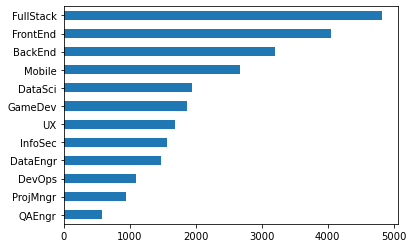

In [7]:
job_prefs = {}
for col in job_interests:
    job_prefs[col[11:]] = survey[col].sum()

import matplotlib.pyplot as plt
prefs = pd.Series(job_prefs).sort_values()

prefs.plot.barh(rot = 0)
plt.show()

Because we're targeting firstly those interested in web and mobile development, as well as game development and data science, the most relevant answers are: FrontEnd, BackEnd, FullStack, Mobile, DataSci, GameDev. These are the six most popular responses. Let's see what proportion of the total responses they represent, as well as how many survey respondents indicated a job preference:

In [8]:
job_response_total = survey[job_interests].any(axis = 1).sum()

print('Total Job Role Responses: ', job_response_total, 
      'or', round(job_response_total / survey.shape[0] *100,1), '%' )
print('Total Who Expressed no Job Role Preference:', (survey.shape[0] - job_response_total),
      'or', round((survey.shape[0] - job_response_total) / survey.shape[0] *100,1) , '%')


Total Job Role Responses:  7986 or 43.9 %
Total Who Expressed no Job Role Preference: 10189 or 56.1 %


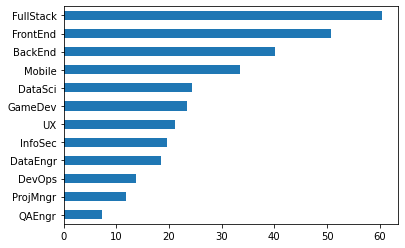

In [9]:
prefs_norm = round(prefs / job_response_total * 100,2)

prefs_norm.plot.barh(rot = 0)
plt.show()

The above shows responses from those who expressed any job role interest. They represent just under half of the total respondents, so we don't have information about the interests of the other half. Those who are actively thinking about jobs or looking for jobs may have different interests than those who aren't. Hence, our entire survey sample may have different interests. 

Given this limitation, we see that about 60% expressed interest in Full Stack, 60% in Back End Development, and 50% in Front End Development, which are relevant to our products. Mobile, Data Science and Game Development are around 25-35% interest each.

Let's see how many expressed interest in *any* one of our six categories:

In [10]:
relevant_jobs = ['JobInterestFrontEnd','JobInterestFullStack', 'JobInterestBackEnd',
                       'JobInterestMobile', 'JobInterestDataSci', 'JobInterestGameDev']

interest_any = survey[relevant_jobs].any(axis=1).sum()

print('Percent interested in any of top six:', round(interest_any / job_response_total*100, 1))

Percent interested in any of top six: 94.6


This shows that almost all respondents who expressed a job interest chose one of the six jobs most relevant to our courses and advertising. This is the best evidence so far that this sample reflects a population we are targeting for advertising.

Lastly, we will check how many subjects people expressed interest in.

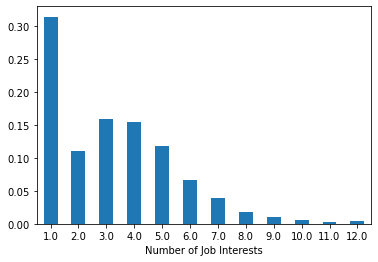

In [11]:
survey['num_job_interests'] = survey[job_interests].sum(axis = 1)

survey['num_job_interests'][survey['num_job_interests'] != 0].value_counts(normalize = True).sort_index().plot.bar(rot = 0)
plt.xlabel('Number of Job Interests')
plt.show()

We can see that about 30% of respondents chose only one interest, and the remaining 70% mainly chose between 2 and 6 interests. This indicates that many respondents have multiple interests, so might be interested in more than one of our products.

## Best Countries to Advertise In

Next we'll determine where those who indicated interest in one of these six jobs live, in order to identify the two countries with the most promising advertising markets.

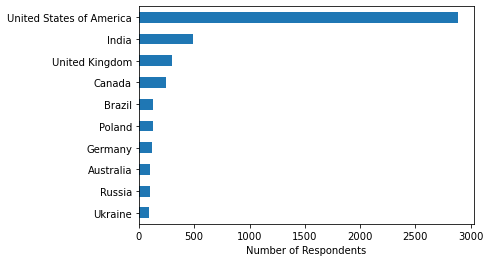

In [12]:
#Subset who indicated interest in at least one job
survey_subset = survey[survey[relevant_jobs].any(axis = 1)].copy()

top_10_countries = survey_subset['CountryLive'].value_counts().head(10)

top_10_countries.plot.barh().invert_yaxis()
plt.xlabel('Number of Respondents')
plt.show()

We can see that the US has by far the most participants, followed by India, United Kingdom and Canada. Let's isolate the top 4 and see what percent of total responses they represent:

In [13]:
round(survey_subset['CountryLive'].value_counts(normalize = True).head(4)*100,1)

United States of America    45.3
India                        7.7
United Kingdom               4.7
Canada                       3.8
Name: CountryLive, dtype: float64

We should definitely advertise in the US. For the other 3 countries, let's look at whether there are any significant differences in mean income:

In [14]:
survey_subset.pivot_table(values = 'Income', index = 'CountryLive').loc[['India', 'United Kingdom', 'Canada']]

,Income
CountryLive,
India,39585.306122
United Kingdom,38022.947368
Canada,32247.373737


India and the UK are comparable and close to the mean of the entire survey:

In [15]:
survey_subset['Income'].describe()

count       2682.000000
mean       38724.454139
std        42333.846331
min         6000.000000
25%        18000.000000
50%        33000.000000
75%        50000.000000
max      1000000.000000
Name: Income, dtype: float64

We can get more precise information by looking specifically at how much money survey respondents have spent per month. using the `MoneyForLearning` and `MonthsProgramming` variables. We want to avoid dividing by zero months, which we can do by dropping those responses or converting them to 1 month. We investigate how many zero month responses there are:

In [16]:
zero_months = survey_subset['MonthsProgramming'] == 0
print('There are', survey_subset[zero_months].shape[0], 'responses of zero months, which is', 
      round(survey_subset[zero_months].shape[0] / survey_subset.shape[0] *100,1), '% of responses')


There are 256 responses of zero months, which is 3.4 % of responses


These respondents represent only a small fraction of the data. Since they're new to programming, they may represent better advertising targets because they have no brand loyalty. On the other hand, they haven't proven that they'll stick with programming yet. Just in case, we'll include them by changing their number of months programming to 1. Then we'll calculate the average money spent per month and examine its distribution.

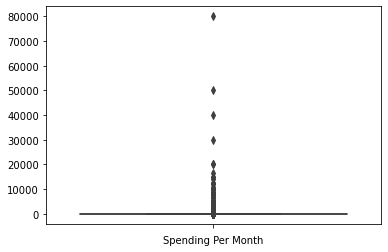

In [17]:
survey_subset['MonthsProgramming'].replace(0, 1, inplace = True)

survey_subset['money_per_month'] = survey_subset['MoneyForLearning'] / survey_subset['MonthsProgramming']

import seaborn as sns
sns.boxplot(y = 'money_per_month', data = survey_subset)
plt.xlabel('Spending Per Month')
plt.ylabel('')
plt.show()

There are some unreasonably high values here; it seems unrealistic that someone is going to spend \\$80,000 per month. A reasonable upper bound would be \\$1000; let's check that this won't eliminate too many responses, and then limit responses to those \\$1000 and below before proceeding to investigate the distributions in the top four countries.

(Note to self - could examine outliers in more detail to determine reasons for high spending before deciding to exclude.)

Responses above $1000: 210


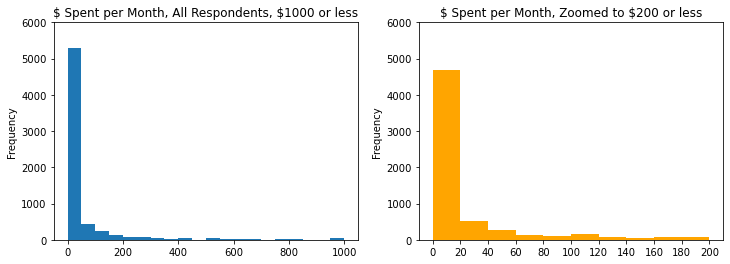

In [18]:
print('Responses above $1000:', survey_subset[survey_subset['money_per_month'] > 1000].shape[0])

survey_subset_2 = survey_subset[survey_subset['money_per_month'] <= 1000]

fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
survey_subset_2['money_per_month'].plot.hist(bins = 20, ylim=(0,6000))
plt.title('\$ Spent per Month, All Respondents, $1000 or less')

plt.subplot(1,2,2)
survey_subset_2['money_per_month'].plot.hist(bins = 10, range = (0,200), ylim=(0,6000), color = 'orange')
from numpy import arange
plt.xticks(arange(0,201,20))
plt.title('\$ Spent per Month, Zoomed to $200 or less')
plt.show()

The vast majority spend in the \\$0-\\$50 range. For comparison, we charge $59 per month. We can see if there's a substantial difference by country:

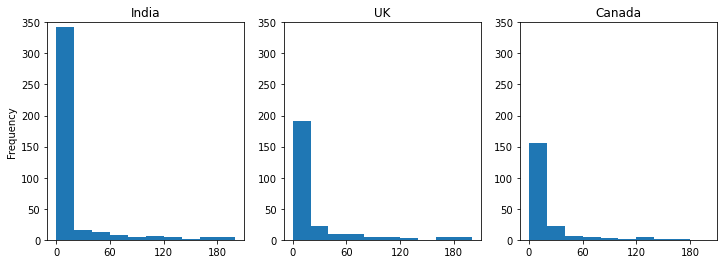

In [19]:
fig = plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
survey_subset_2[survey_subset_2['CountryLive'] == 'India']['money_per_month'].plot.hist(ylim = (0,350), range = (0,200))
plt.title('India')
plt.xticks(arange(0,201,60))

plt.subplot(1,3,2)
survey_subset_2[survey_subset_2['CountryLive'] == 'United Kingdom']['money_per_month'].plot.hist(ylim = (0,350), range = (0,200))
plt.title('UK')
plt.ylabel('')
plt.xticks(arange(0,201,60))

plt.subplot(1,3,3)
survey_subset_2[survey_subset_2['CountryLive'] == 'Canada']['money_per_month'].plot.hist(ylim = (0,350), bins = 10, range = (0,200))
plt.title('Canada')
plt.xticks(arange(0,201,60))
plt.ylabel('')
plt.show()

From the graph alone, it appears that although India has more total responses, proportionally more of them are in the \\$0-25 range. We can look at the mean spending of each country to compare them another way:

In [20]:
country_mean = survey_subset_2.groupby('CountryLive')['money_per_month'].mean()

country_mean[['India', 'Canada', 'United Kingdom']]

CountryLive
India             45.103579
Canada            50.045569
United Kingdom    33.421836
Name: money_per_month, dtype: float64

From the above we can see that Canada has the highest mean spending; however, mean does not seem to be a particularly good measure for what we're interested in. It doesn't matter if a few people are willing to spend a lot of money, since we'll still only get \\$59 per month from each of them. Counting how many people in each country would spend \\$50/month or more will give us a better idea of how big our market is in each country. For this, we'll count both with and without the outliers:

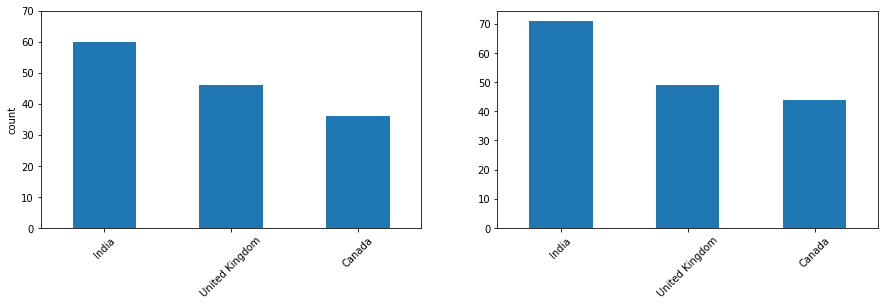

In [21]:
country_high_spend = survey_subset_2[survey_subset_2['money_per_month'] >= 50].groupby('CountryLive')['money_per_month'].count()

country_high_spend_outliers = survey_subset[survey_subset['money_per_month'] >= 50].groupby('CountryLive')['money_per_month'].count()

fig = plt.figure(figsize = (15,4) )
plt.subplot(1,2,1)
country_high_spend[['India', 'United Kingdom', 'Canada']].plot.bar(xlabel = '', ylabel = 'count', rot = 45, ylim = (0,70))


plt.subplot(1,2,2)
country_high_spend_outliers[['India', 'United Kingdom', 'Canada']].plot.bar(xlabel = '', rot = 45)
plt.show()

We see that with or without outliers, India and the UK have more customers willing to pay \\$50 per month of more. Now Canada comes in third place, despite having the highest mean. So, we tentatively suggest India as the second market. However, as this is a sample from one survey, we would recommend more focused research could be done in India, the UK and Canada to confirm a best fit.